# USD/CAD PREDICTION

## IMPORTS

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

BATCH_SIZE = 32	# enter the batch size
EPOCHS = 5	# enter the epochs
DAYS = 30	# enter the previous days

## DATA PREPROCESSING

In [44]:
training_set = pd.read_csv(r"Dataset\USDCADtrain.csv", index_col="Date")
training_set.dropna(inplace=True)
training_set.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [45]:
training_set = training_set.iloc[:, 0:1].values ## contains only open values
len(training_set)

4585

## FEATURE SCALING

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
training_set_sc = sc.fit_transform(training_set)

## APPROPRIATE DATA STRUCTURE -- TIMESTEPS = 30, OUTPUT = 1

In [47]:
X_train = []
y_train = []
for i in range(DAYS, len(training_set_sc)):
    X_train.append(training_set_sc[i-DAYS:i, 0])
    y_train.append(training_set_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## BUILDING THE RNN USING LSTM

### INITIALIZING THE MODEL

In [48]:
rnn = tf.keras.models.Sequential()

### FIRST LAYER (LSTM)

In [49]:
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True, input_shape=(DAYS, 1)))
rnn.add(tf.keras.layers.Dropout(0.2))

In [50]:
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [51]:
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))


In [52]:
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))


In [53]:
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75))
rnn.add(tf.keras.layers.Dropout(0.2))

In [54]:
rnn.add(tf.keras.layers.Dense(1))

### COMPILING OUR MODEL

In [55]:
rnn.compile(optimizer="adam", loss="mean_squared_error")

## TRAINING OUR MODEL

In [56]:
# from tensorflow.keras import callbacks
# callback = callbacks.EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

LSTM TAKES 3D INPUT = (Batch_size, timesteps, output)

In [57]:
X_train = X_train.reshape(len(X_train), DAYS, 1)
rnn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
143/143 [==============================] - 23s 94ms/step - loss: 0.0134
Epoch 2/5
143/143 [==============================] - 16s 113ms/step - loss: 0.0043
Epoch 3/5
143/143 [==============================] - 15s 108ms/step - loss: 0.0037
Epoch 4/5
143/143 [==============================] - 15s 106ms/step - loss: 0.0037
Epoch 5/5
143/143 [==============================] - 16s 109ms/step - loss: 0.0032


## CREATING DATASET FOR PREDICTION

In [58]:
train_set = pd.read_csv(r"Dataset\USDCADtrain.csv", index_col="Date")
train_set.dropna(inplace=True)

In [59]:
test_set = pd.read_csv(r"Dataset\USDCADtest.csv", index_col="Date")
test_set.dropna(inplace=True)

In [60]:
whole_dataset = pd.concat((train_set, test_set), 0)
whole_dataset1 = pd.concat((train_set, test_set), 0)
whole_dataset = whole_dataset.iloc[:, 0:1].values

In [61]:
previous30days = []
for i in range(len(whole_dataset)-len(test_set), len(whole_dataset)):
    previous30days.append(whole_dataset[i-DAYS:i, 0])
previous30days = np.array(previous30days)
previous30days


array([[1.25235, 1.26134, 1.2505 , 1.24981, 1.24883, 1.23961, 1.24077,
        1.2301 , 1.22763, 1.22808, 1.2277 , 1.23   , 1.22664, 1.21562,
        1.21166, 1.20914, 1.2095 , 1.21208, 1.21704, 1.2113 , 1.20622,
        1.20695, 1.2131 , 1.20618, 1.20693, 1.2049 , 1.2064 , 1.21296,
        1.20709, 1.20767],
       [1.26134, 1.2505 , 1.24981, 1.24883, 1.23961, 1.24077, 1.2301 ,
        1.22763, 1.22808, 1.2277 , 1.23   , 1.22664, 1.21562, 1.21166,
        1.20914, 1.2095 , 1.21208, 1.21704, 1.2113 , 1.20622, 1.20695,
        1.2131 , 1.20618, 1.20693, 1.2049 , 1.2064 , 1.21296, 1.20709,
        1.20767, 1.20593],
       [1.2505 , 1.24981, 1.24883, 1.23961, 1.24077, 1.2301 , 1.22763,
        1.22808, 1.2277 , 1.23   , 1.22664, 1.21562, 1.21166, 1.20914,
        1.2095 , 1.21208, 1.21704, 1.2113 , 1.20622, 1.20695, 1.2131 ,
        1.20618, 1.20693, 1.2049 , 1.2064 , 1.21296, 1.20709, 1.20767,
        1.20593, 1.2068 ],
       [1.24981, 1.24883, 1.23961, 1.24077, 1.2301 , 1.22763, 1.228

### SCALING THE TEST_DATA

In [62]:
scaled_test_data = sc.transform(previous30days.reshape(-1, 1))

In [63]:
scaled_test_data = scaled_test_data.reshape(-1, DAYS)

### RESHAPING THE VALUES TO 3D (BATCH_SIZE, TIMESTEPS, OUTPUT)

In [64]:
scaled_test_data = scaled_test_data.reshape(scaled_test_data.shape[0], DAYS, 1)

In [65]:
y_pred = sc.inverse_transform(rnn.predict(scaled_test_data))
y_pred = y_pred.reshape(-1,)

## PLOTTING THE GRAPH

In [66]:
predicted_data = pd.DataFrame({"Predicted": y_pred}, index=test_set.index)
plotdata = pd.concat((whole_dataset1["Open"], predicted_data), 1)
plotdata

,Open,Predicted
Date,,
2003-09-17,1.36670,NaN
2003-09-18,1.36600,NaN
2003-09-19,1.36200,NaN
2003-09-22,1.34130,NaN
2003-09-23,1.35490,NaN
...,...,...
2021-06-30,1.23970,1.221557
2021-07-01,1.23957,1.223412
2021-07-02,1.24397,1.225297


In [67]:
plotdata = plotdata.iloc[4500:, :]

In [68]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<AxesSubplot:xlabel='Date', ylabel='Open'>

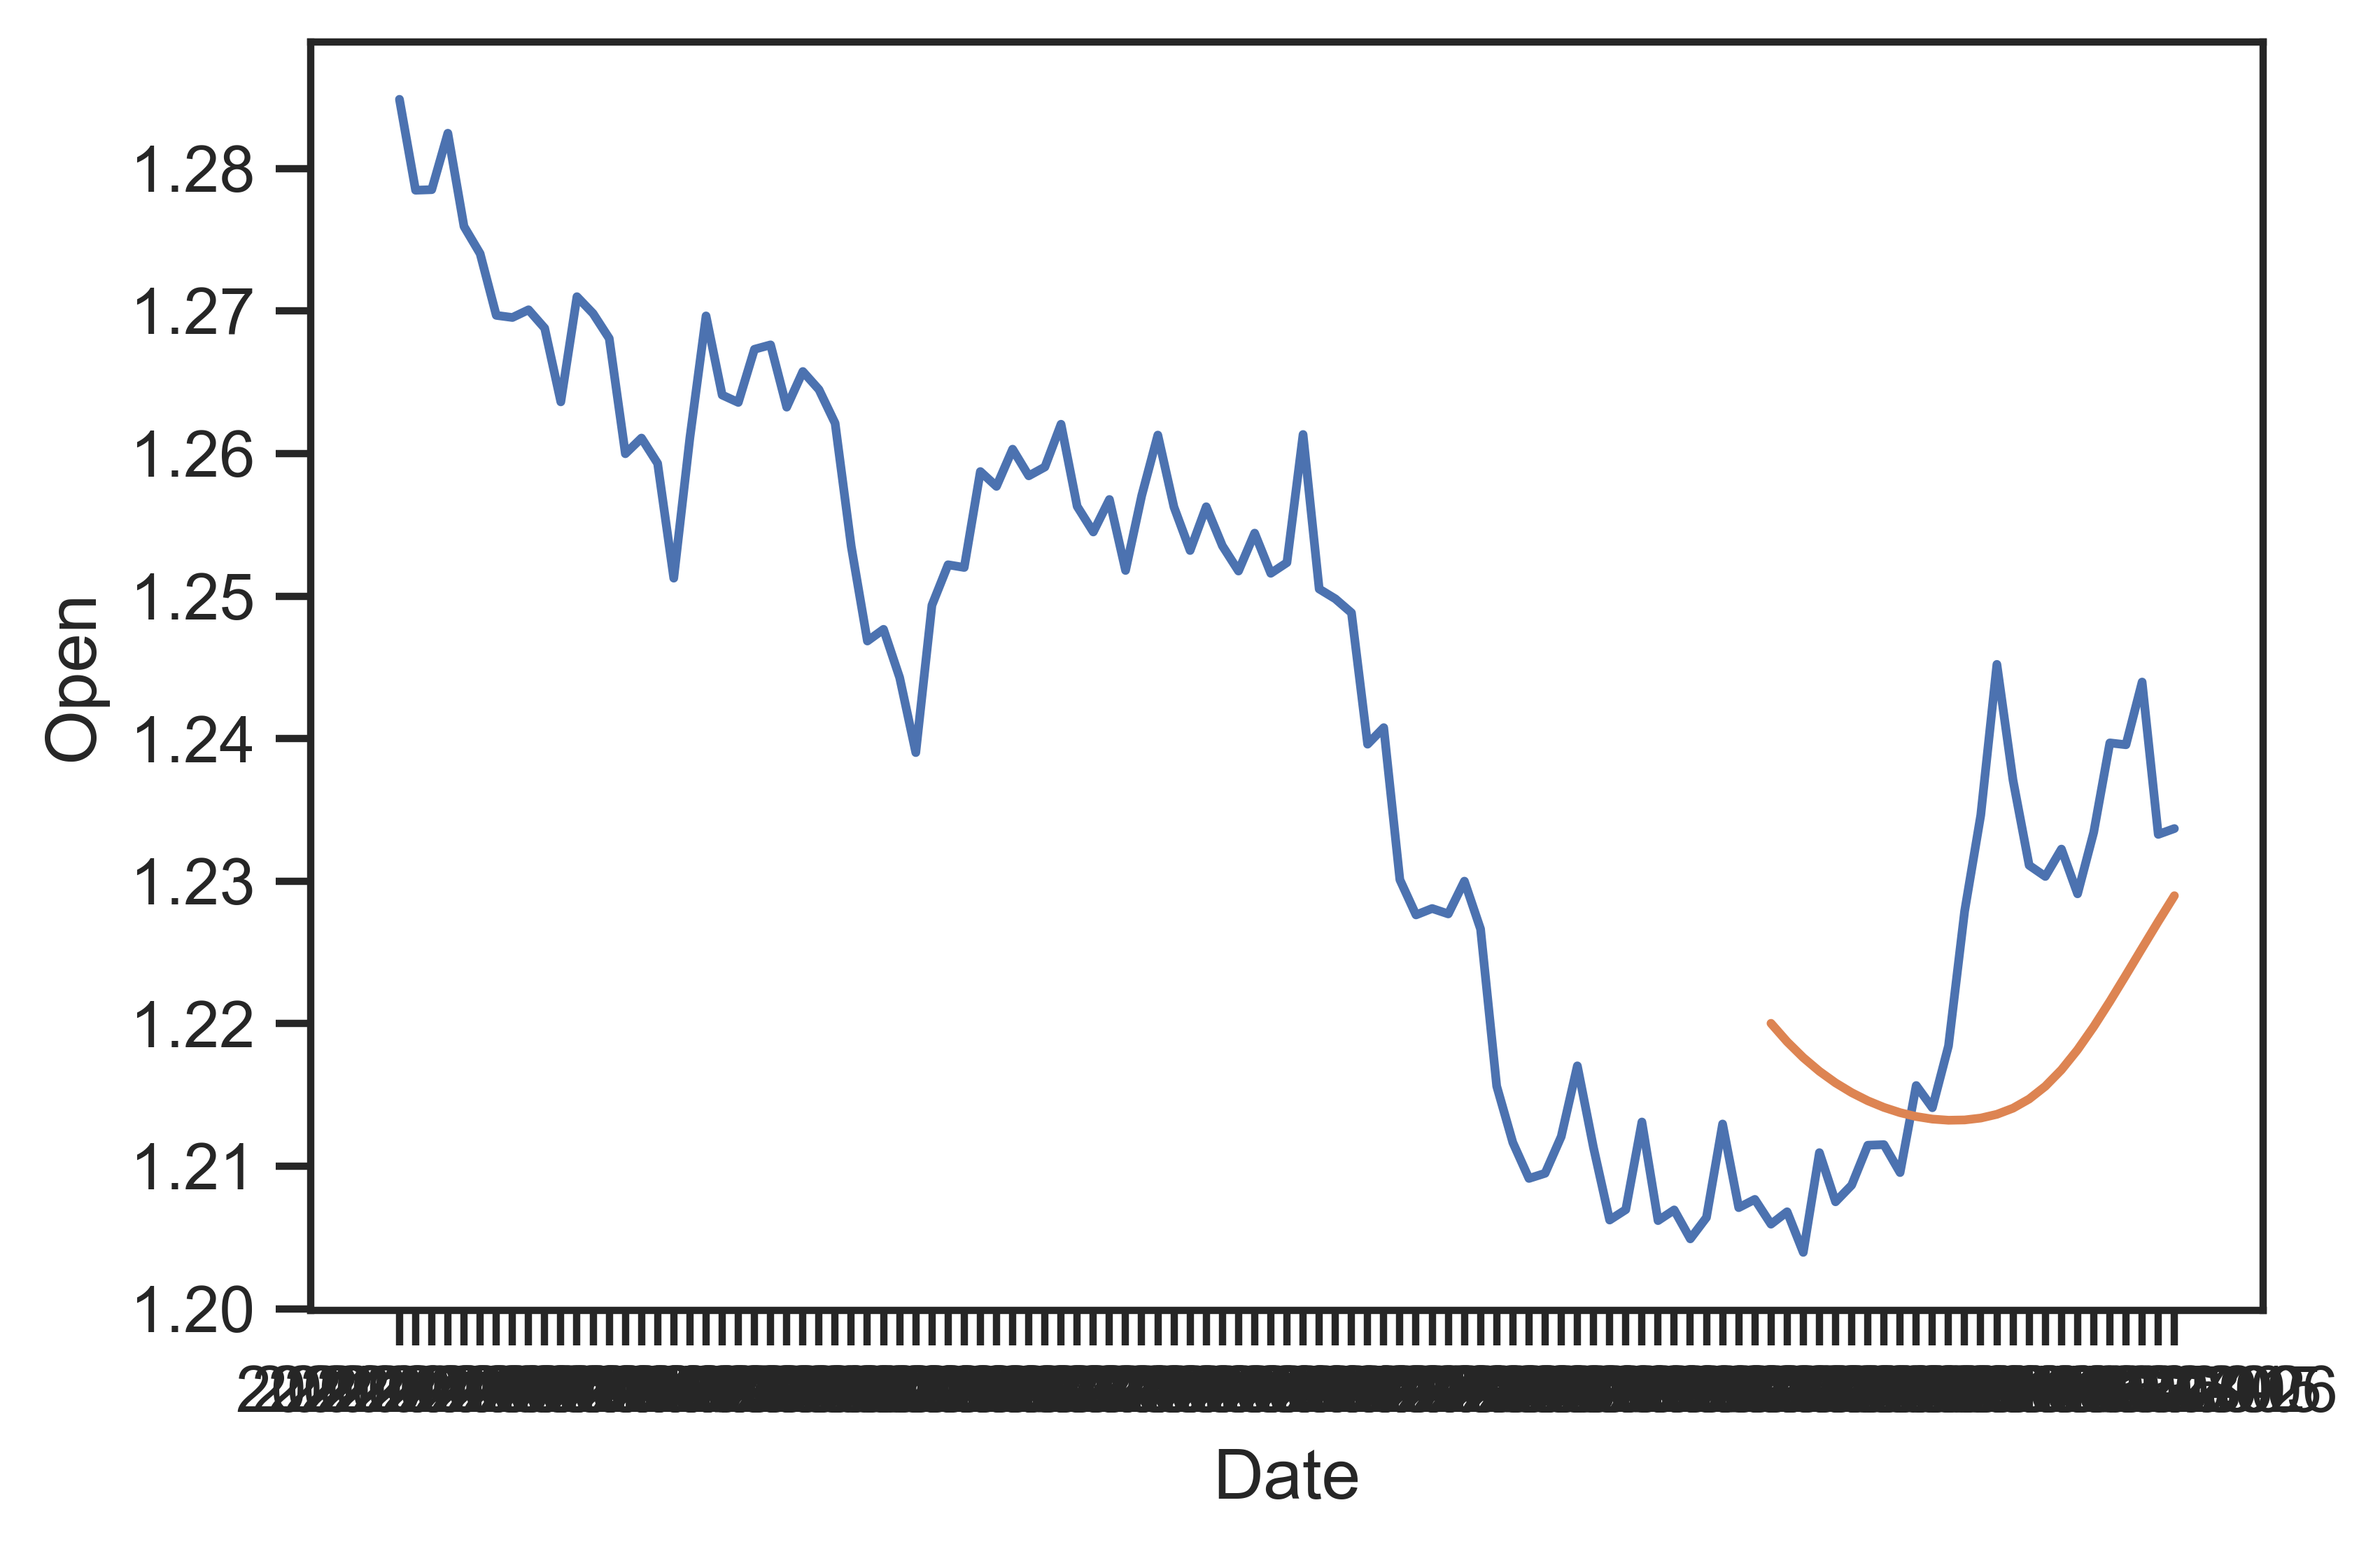

In [69]:
sns.lineplot(data=plotdata["Open"])
sns.lineplot(data=plotdata["Predicted"])

In [70]:
B = BATCH_SIZE
D = DAYS
E = EPOCHS
name = f"_B{B}_E{E}_D{D}"
filename = "./Predictions/USDCAD-Predictions"+name
rnn.save(filename)

INFO:tensorflow:Assets written to: ./Predictions/USDCAD-Predictions_B32_E5_D30\assets


INFO:tensorflow:Assets written to: ./Predictions/USDCAD-Predictions_B32_E5_D30\assets


## NEXT DAY PREDICTION

In [71]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import seaborn as sns

In [72]:
# rnn = tf.keras.models.load_model("./USDCADprediction")

In [73]:
# fullcsv = pd.read_csv("./Dataset/USDCADfull.csv", index_col="Date")

In [74]:
# fullcsv.dropna(inplace=True)

In [75]:
# open_2d = fullcsv.iloc[:, 0:1].values

In [76]:
# from sklearn.preprocessing import MinMaxScaler
# sc1 = MinMaxScaler((0, 1))
# open_2d_scaled = sc1.fit_transform(open_2d)
# length = len(open_2d_scaled)

In [77]:
# open_1d_scaled = open_2d_scaled.reshape(1, -1)

In [78]:
# value_for_prediction_previous = []
# value_for_prediction_previous.append(open_1d_scaled[0, length-60-1:length-1])
# value_for_prediction_previous = np.array(value_for_prediction_previous)

# value_for_prediction = []
# value_for_prediction.append(open_1d_scaled[0, length-60:length])
# value_for_prediction = np.array(value_for_prediction)

In [79]:
# value_for_prediction_previous = value_for_prediction_previous.reshape(1, value_for_prediction_previous.shape[1], value_for_prediction_previous.shape[0])
# value_for_prediction = value_for_prediction.reshape(1, value_for_prediction.shape[1], value_for_prediction.shape[0])

In [80]:
# prediction_previous = (sc1.inverse_transform(rnn.predict(value_for_prediction_previous))).reshape(-1, )
# prediction = (sc1.inverse_transform(rnn.predict(value_for_prediction))).reshape(-1, )

In [81]:
# print("MIGHT GO UP!" if prediction > prediction_previous else "WILL GO DOWN!")
# print(prediction_previous, prediction)

## AFTER LOADING


In [2]:
B = BATCH_SIZE
E = EPOCHS
D = DAYS

In [3]:
model = tf.keras.models.load_model(f'./Predictions/USDCAD-Predictions_B{B}_E{E}_D{D}')

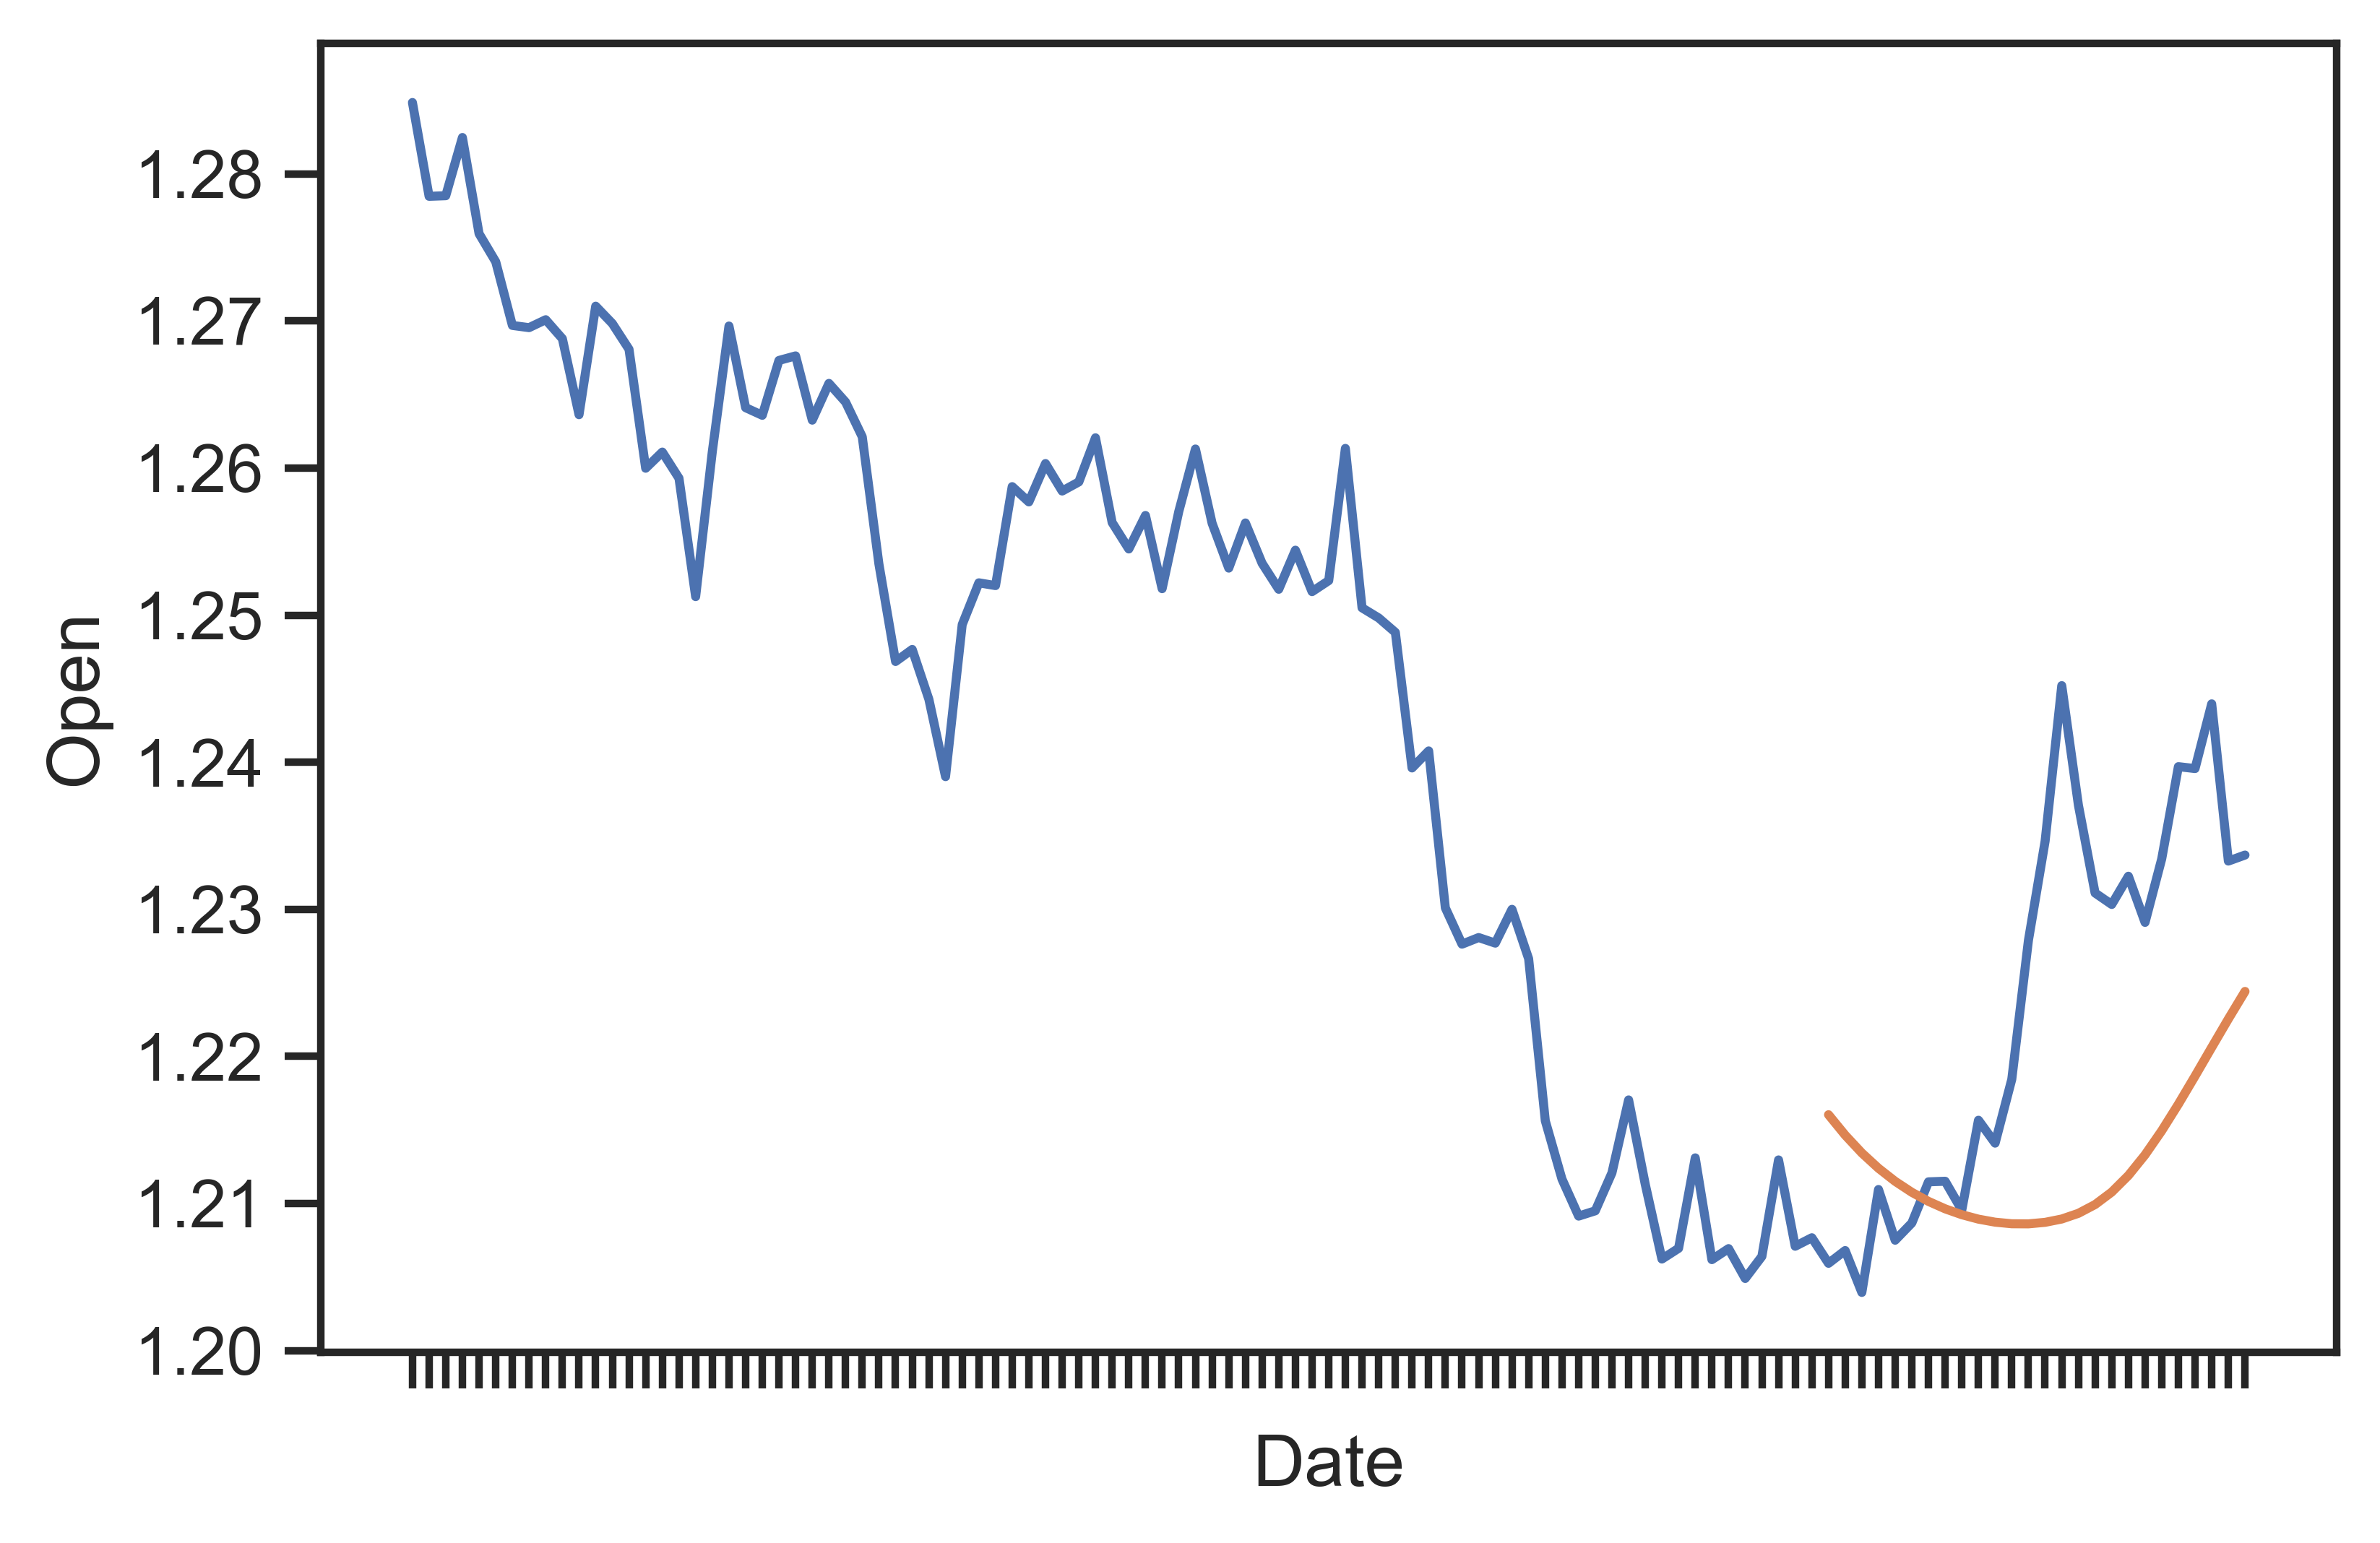

In [4]:
train_set = pd.read_csv(r"Dataset\USDCADtrain.csv", index_col="Date")
train_set.dropna(inplace=True)
test_set = pd.read_csv(r"Dataset\USDCADtest.csv", index_col="Date")
test_set.dropna(inplace=True)
whole_dataset = pd.concat((train_set, test_set), 0)
whole_dataset1 = pd.concat((train_set, test_set), 0)
whole_dataset = whole_dataset.iloc[:, 0:1].values
previous30days = []
for i in range(len(whole_dataset)-len(test_set), len(whole_dataset)):
    previous30days.append(whole_dataset[i-DAYS:i, 0])
previous30days = np.array(previous30days)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_test_data = sc.fit_transform(previous30days.reshape(-1, 1))
scaled_test_data = scaled_test_data.reshape(-1, DAYS)
scaled_test_data = scaled_test_data.reshape(scaled_test_data.shape[0], DAYS, 1)
y_pred = sc.inverse_transform(model.predict(scaled_test_data))
y_pred = y_pred.reshape(-1,)
predicted_data = pd.DataFrame({"Predicted": y_pred}, index=test_set.index)
plotdata = pd.concat((whole_dataset1["Open"], predicted_data), 1)
plotdata = plotdata.iloc[4500:, :]
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
ax1 = sns.lineplot(data=plotdata["Open"]).set(xticklabels=[])
ax2 = sns.lineplot(data=plotdata["Predicted"]).set(xticklabels=[])